## 시각화 2주차 과제

In [1]:
import pandas as pd
import matplotlib.pyplot as plt ; plt.rcParams['font.family'] = 'NanumGothic'
from mpl_toolkits import mplot3d
import seaborn as sns

### Seaborn 내장 데이터셋 tips

In [2]:
tip = sns.load_dataset('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<function matplotlib.pyplot.show(*args, **kw)>

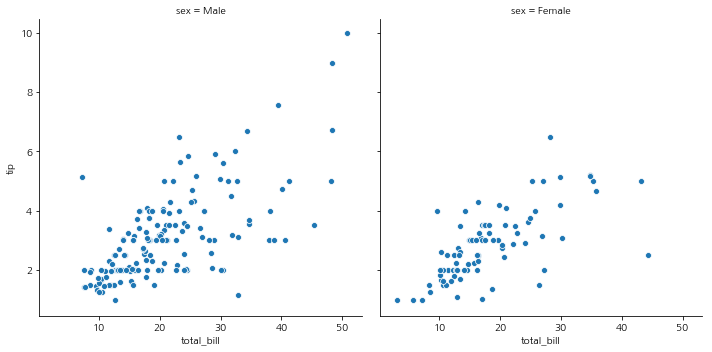

In [3]:
sns.relplot(x='total_bill', y='tip', data=tip, kind='scatter', col='sex')
plt.show

C:\Users\njj06\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\njj06\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


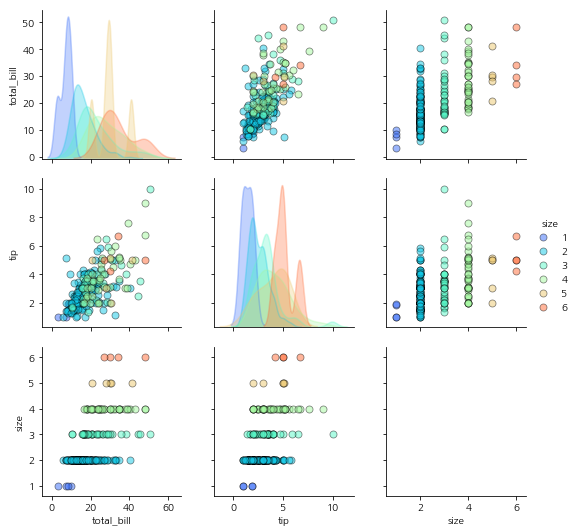

In [4]:
sns.pairplot(tip[['total_bill', 'tip', 'size']], hue='size', palette="rainbow",
            plot_kws = {'alpha':0.5, 's': 50, 'edgecolor':'k'}, diag_kws = {'alpha':0.3})
plt.show()
# 마지막 빈 plot 왜 나오는 걸까?

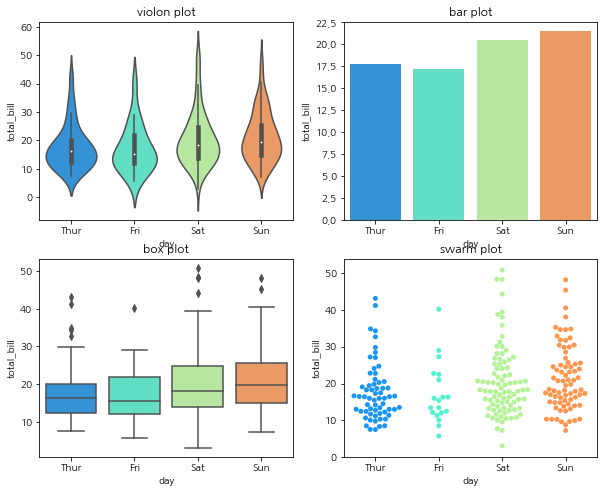

In [5]:
fig, ax = plt.subplots(2, 2, figsize=(10,8))
sns.violinplot(x="day", y="total_bill", data=tip, palette='rainbow', ax=ax[0,0])
sns.barplot(x="day", y="total_bill", data=tip, ci=None, palette='rainbow', ax=ax[0,1])
sns.boxplot(x="day", y="total_bill", data=tip, palette='rainbow', ax=ax[1,0])
sns.swarmplot(x="day", y="total_bill", data=tip, palette='rainbow', ax=ax[1,1])
ax[0,0].set_title('violon plot')
ax[0,1].set_title('bar plot')
ax[1,0].set_title('box plot')
ax[1,1].set_title('swarm plot')
plt.show()

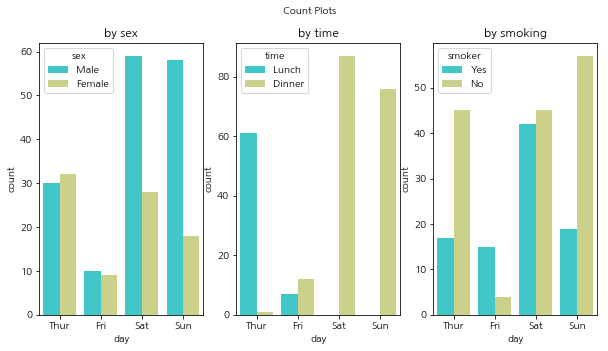

In [6]:
fig, ax = plt.subplots(1,3, figsize=(10,5))
a = sns.countplot(x='day', data=tip, hue='sex', palette='rainbow', ax=ax[0])
b = sns.countplot(x='day', data=tip, hue='time', palette='rainbow', ax=ax[1])
c = sns.countplot(x='day', data=tip, hue='smoker', palette='rainbow', ax=ax[2])
fig.suptitle('Count Plots', fontsize=10)
ax[0].set_title('by sex')
ax[1].set_title('by time')
ax[2].set_title('by smoking')
plt.show()
# 왜 안될까? --> 해결!

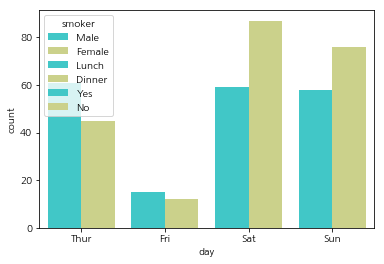

In [7]:
# 한꺼번에 그리면 count 합쳐진다(아래랑 비교)
sns.countplot(x='day', data=tip, hue='sex', palette='rainbow')
sns.countplot(x='day', data=tip, hue='time', palette='rainbow')
sns.countplot(x='day', data=tip, hue='smoker', palette='rainbow')

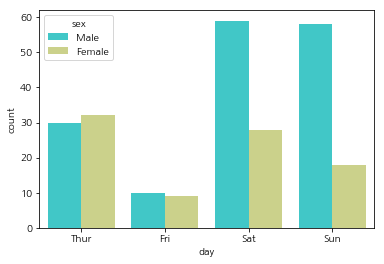

In [8]:
sns.countplot(x='day', data=tip, hue='sex', palette='rainbow')

C:\Users\njj06\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


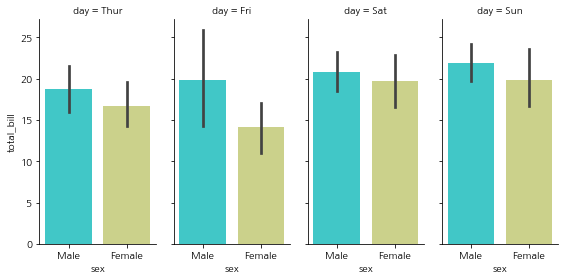

In [9]:
# Facetgrid 사용해보기(1)
g= sns.FacetGrid(tip, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", palette='rainbow')

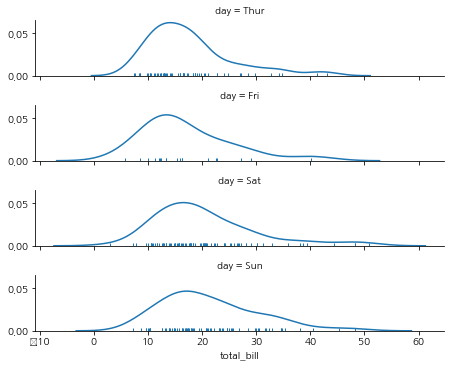

In [11]:
#Facetgrid 사용해보기(2)
g = sns.FacetGrid(tip, row="day",height=1.3, aspect=5)
g.map(sns.distplot, "total_bill", hist=False, rug=True);

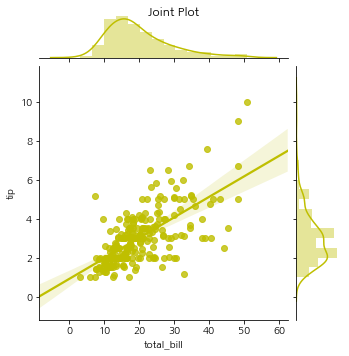

In [12]:
# joint plot w/ regression
a=sns.jointplot(x='total_bill', y='tip', data=tip, kind='reg', color='y', height=5)
a.fig.suptitle('Joint Plot')
plt.show()